## PS5 ## 
### Yuqian Gong ###

In [86]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import LeaveOneOut, KFold
import statsmodels.api as sm


/Users/Nancygong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 1 ##
### (a) ###

In [77]:
wines = pd.read_csv("data/strongdrink.txt")
wines = wines[['cultivar','alco', 'malic', 'tot_phen', 'color_int']]
wines.head()

,cultivar,alco,malic,tot_phen,color_int
0,1,14.23,1.71,2.80,5.64
1,1,13.20,1.78,2.65,4.38
2,1,13.16,2.36,2.80,5.68
3,1,14.37,1.95,3.85,7.80
4,1,13.24,2.59,2.80,4.32


In [78]:
X = wines[['alco','malic','tot_phen', 'color_int']]
y = wines['cultivar']
print(y.value_counts())


2    71
1    59
3    46
Name: cultivar, dtype: int64


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)
MultLogReg = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
MultLogReg.fit(X_train, y_train)
y_pred = MultLogReg.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.87      1.00      0.93        13
          2       1.00      0.90      0.95        21
          3       1.00      1.00      1.00        10

avg / total       0.96      0.95      0.96        44



In [80]:
e1 = 1 - 0.87
e2 = 1 - 1
e3 = 1 - 1
print("Error rate for category 1 is ", e1)
print("Error rate for category 2 is ", e2)
print("Error rate for category 3 is ", e3)

Error rate for category 1 is  0.13
Error rate for category 2 is  0
Error rate for category 3 is  0


So based on the prediction results, the categroy 2 and 3 in cultivar is best predicted with error rate 0. Categroy 2 has 71 observations, the most observations while category 3 has only 46 observations, which is the least.

### (b) ###

In [81]:
Xvars = X.values
yvars = y.values
N_loo = Xvars.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)
MSE_vec = np.zeros(N_loo)
y_test_vec = np.zeros(N_loo)
y_pred_vec = np.zeros(N_loo)
for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    y_test_vec[test_index] = y_test
    MultLogReg = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
    MultLogReg.fit(X_train, y_train)
    y_pred = MultLogReg.predict(X_test)
    y_pred_vec[test_index] = y_pred
    MSE_vec[test_index] = (y_test - y_pred) ** 2

MSE_loo = MSE_vec.mean()
print("The LOOCV estimate for the test MSE is ", MSE_loo)
print(classification_report(y_test_vec, y_pred_vec))

The LOOCV estimate for the test MSE is  0.0965909090909
             precision    recall  f1-score   support

        1.0       0.90      0.93      0.92        59
        2.0       0.91      0.90      0.91        71
        3.0       0.96      0.93      0.95        46

avg / total       0.92      0.92      0.92       176



In [82]:
e1 = 1- 0.9
e2 = 1 - 0.91
e3 = 1 - 0.96
print("Error rate for category 1 is ", e1)
print("Error rate for category 2 is ", e2)
print("Error rate for category 3 is ", e3)

Error rate for category 1 is  0.09999999999999998
Error rate for category 2 is  0.08999999999999997
Error rate for category 3 is  0.040000000000000036


The error rate for category 1 decreases while the error rates for category 2 and 3 increase.


### (c) ###

In [83]:
k = 4
kf = KFold(n_splits=k, shuffle=True, random_state=10)
kf.get_n_splits(Xvars)
MSE_vec_kf = np.zeros(k)
y_test_kf = np.array([])
y_pred_kf = np.array([])
k_ind = 0
for train_index, test_index in kf.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    y_test_kf = np.concatenate((y_test_kf, y_test), axis = 0)
    MultLogReg = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
    MultLogReg.fit(X_train, y_train)
    y_pred = MultLogReg.predict(X_test)
    y_pred_kf = np.concatenate((y_pred_kf, y_pred), axis = 0)
    MSE_vec_kf[k_ind] = mean_squared_error(y_pred, y_test)
    k_ind += 1

print("The k-fold estimate for the test MSE is", np.mean(MSE_vec_kf))
print(classification_report(y_test_kf, y_pred_kf))

The k-fold estimate for the test MSE is 0.107954545455
             precision    recall  f1-score   support

        1.0       0.87      0.93      0.90        59
        2.0       0.91      0.87      0.89        71
        3.0       0.96      0.93      0.95        46

avg / total       0.91      0.91      0.91       176



In [84]:
e1 = 1 - 0.87
e2 = 1 - 0.91
e3 = 1 - 0.96
print("Error rate for category 1 is ", e1)
print("Error rate for category 2 is ", e2)
print("Error rate for category 3 is ", e3)

Error rate for category 1 is  0.13
Error rate for category 2 is  0.08999999999999997
Error rate for category 3 is  0.040000000000000036


Compared to leave-one-out resampling method, the error rates for category 2 and 3 don't change and the error rate for category 1 increases. Compared to the case in (a), the error rates for category 1 are the same and the error rates for category 2 and 3 increase.

## 2 ##
### (b) ###

<IPython.core.display.Javascript object>


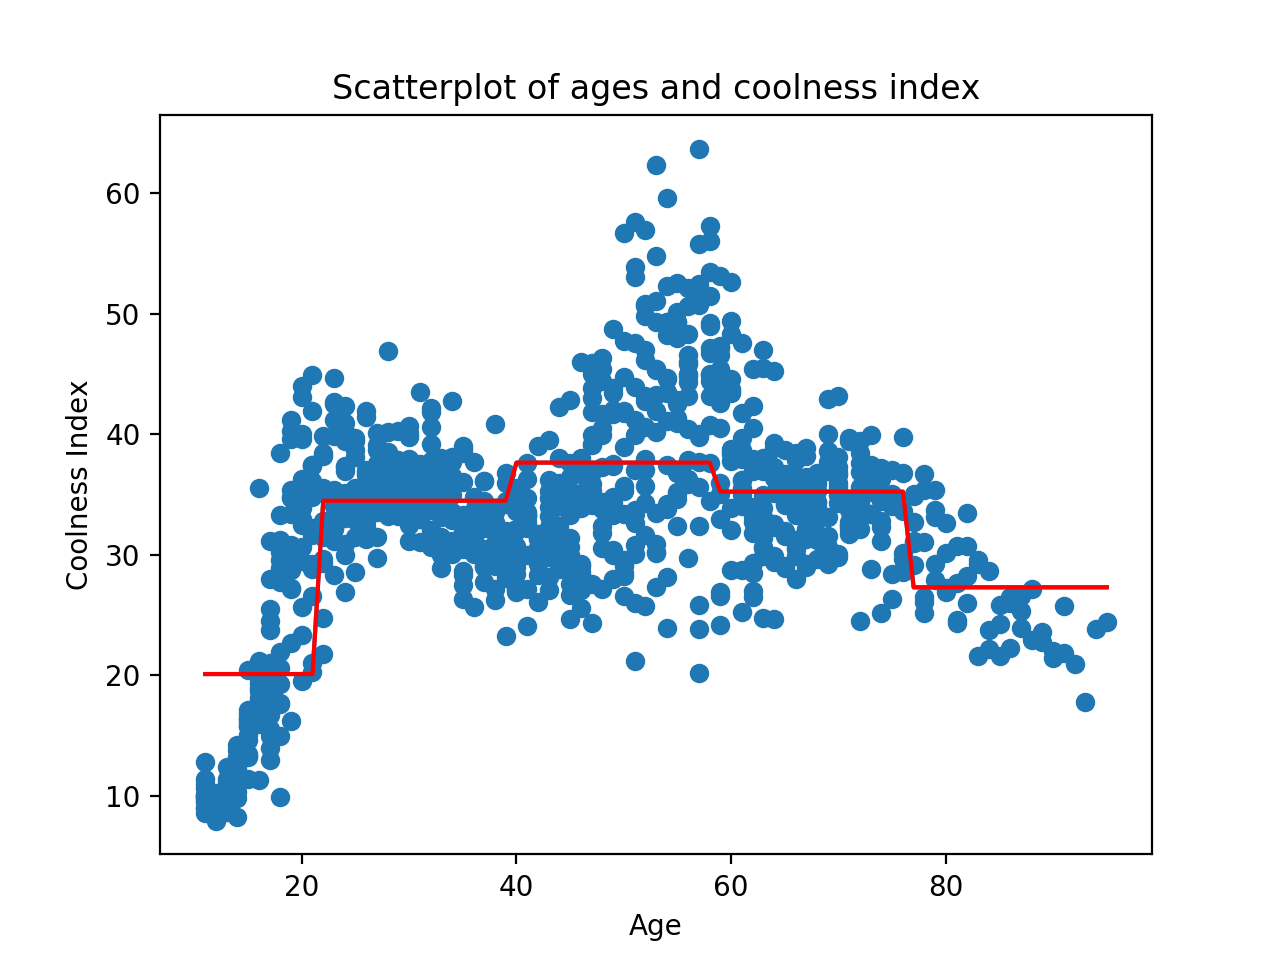

In [87]:
import matplotlib.pyplot as plt
%matplotlib notebook
coolness = pd.read_csv("data/CoolIndex.txt", header = None)
coolness.columns = ["age", "index"]
plt.figure(1)
plt.scatter(coolness["age"].values, coolness["index"].values)
plt.title("Scatterplot of ages and coolness index")
plt.xlabel("Age")
plt.ylabel("Coolness Index")

### (b) ###

<IPython.core.display.Javascript object>


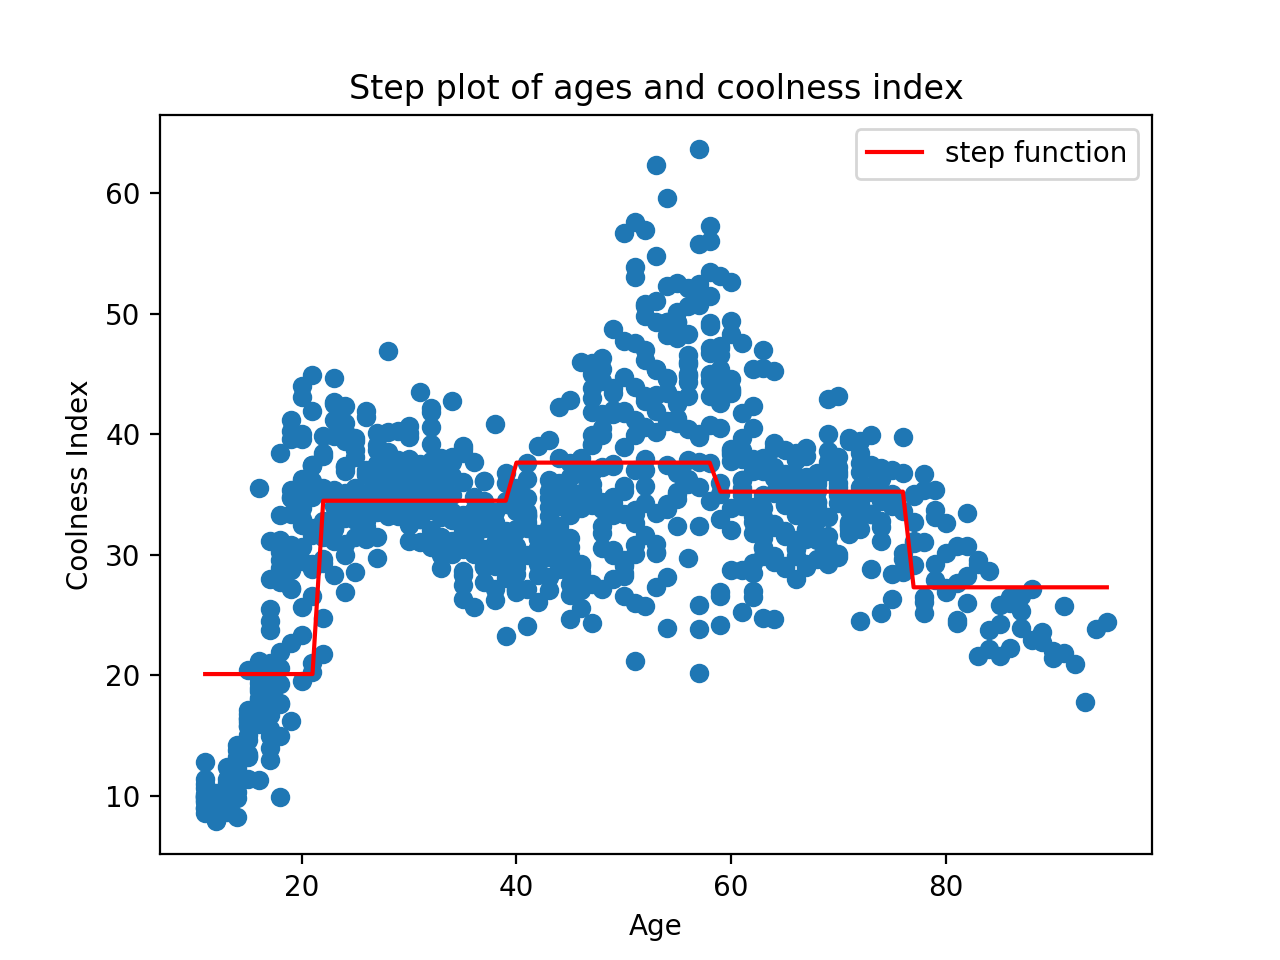

[ 20.10245725  34.47578808  37.63510549  35.22540004  27.29637824]


In [97]:
age = coolness["age"]
index = coolness["index"]
age_bin1 = ((age >= 11) & (age < 22)).astype(int)
age_bin2 = ((age >= 22) & (age < 40)).astype(int)
age_bin3 = ((age >= 40) & (age < 59)).astype(int)
age_bin4 = ((age >= 59) & (age < 77)).astype(int)
age_bin5 = ((age >= 77) & (age <= 95)).astype(int)
X_step = pd.DataFrame(dict(age_bin1 = age_bin1, age_bin2 = age_bin2, age_bin3 = age_bin3, age_bin4 = age_bin4,
                          age_bin5 = age_bin5))
reg = sm.OLS(endog = index, exog = X_step, missing = "drop")
reg_result = reg.fit()
params = np.array(reg_result.params)
plt.figure(2)
plt.scatter(coolness["age"].values, coolness["index"].values)
plt.title("Step plot of ages and coolness index")
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.plot(age, reg_result.predict(), color = 'red', label ="step function")
plt.legend()
print(params)

From the estimated parameters, we can see that the coolness index from age 59 to 77 is about 35.23. 
So the predicted coolness of a 73-year-old is about 35.23.

### (c) ###

<IPython.core.display.Javascript object>


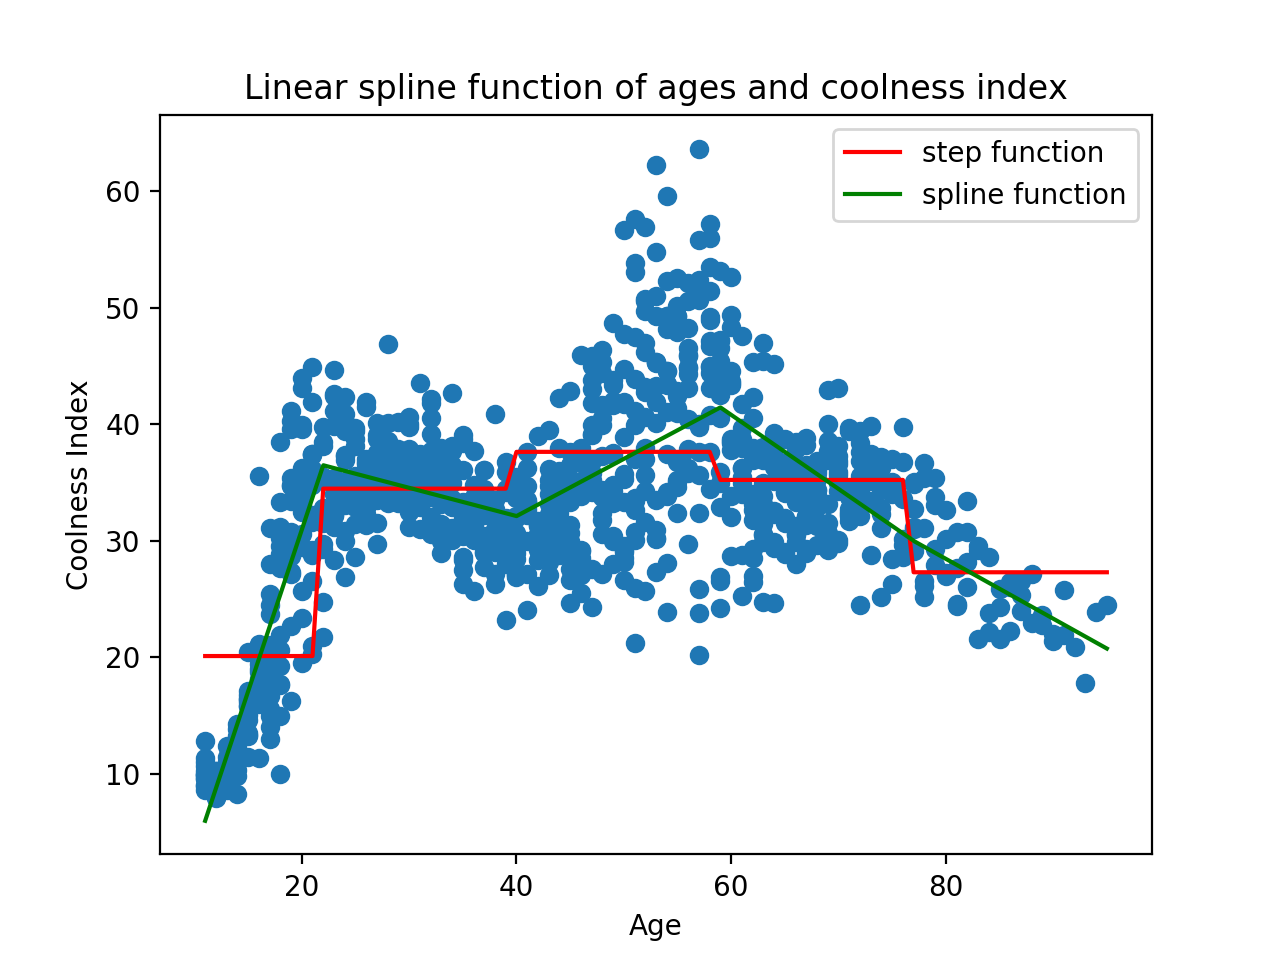

In [103]:
from scipy.interpolate import LSQUnivariateSpline
knots = [22, 40, 59, 77]
spl_coolness = LSQUnivariateSpline(age.values, index.values, knots, k = 1)
age_vec = np.linspace(age.values.min(), age.values.max(), 1000)
plt.figure(3)
plt.scatter(coolness["age"].values, coolness["index"].values)
plt.title("Linear spline function of ages and coolness index")
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.plot(age, reg_result.predict(), color = 'red', label ="step function")
plt.plot(age_vec, spl_coolness(age_vec), "g-", label = "spline function")
plt.legend()

In [120]:
print("The predicted coolness of a 73-year-old person is", float(spl_coolness(73)))


The predicted coolness of a 73-year-old person is 32.536832389143306


### (d) ###

<IPython.core.display.Javascript object>


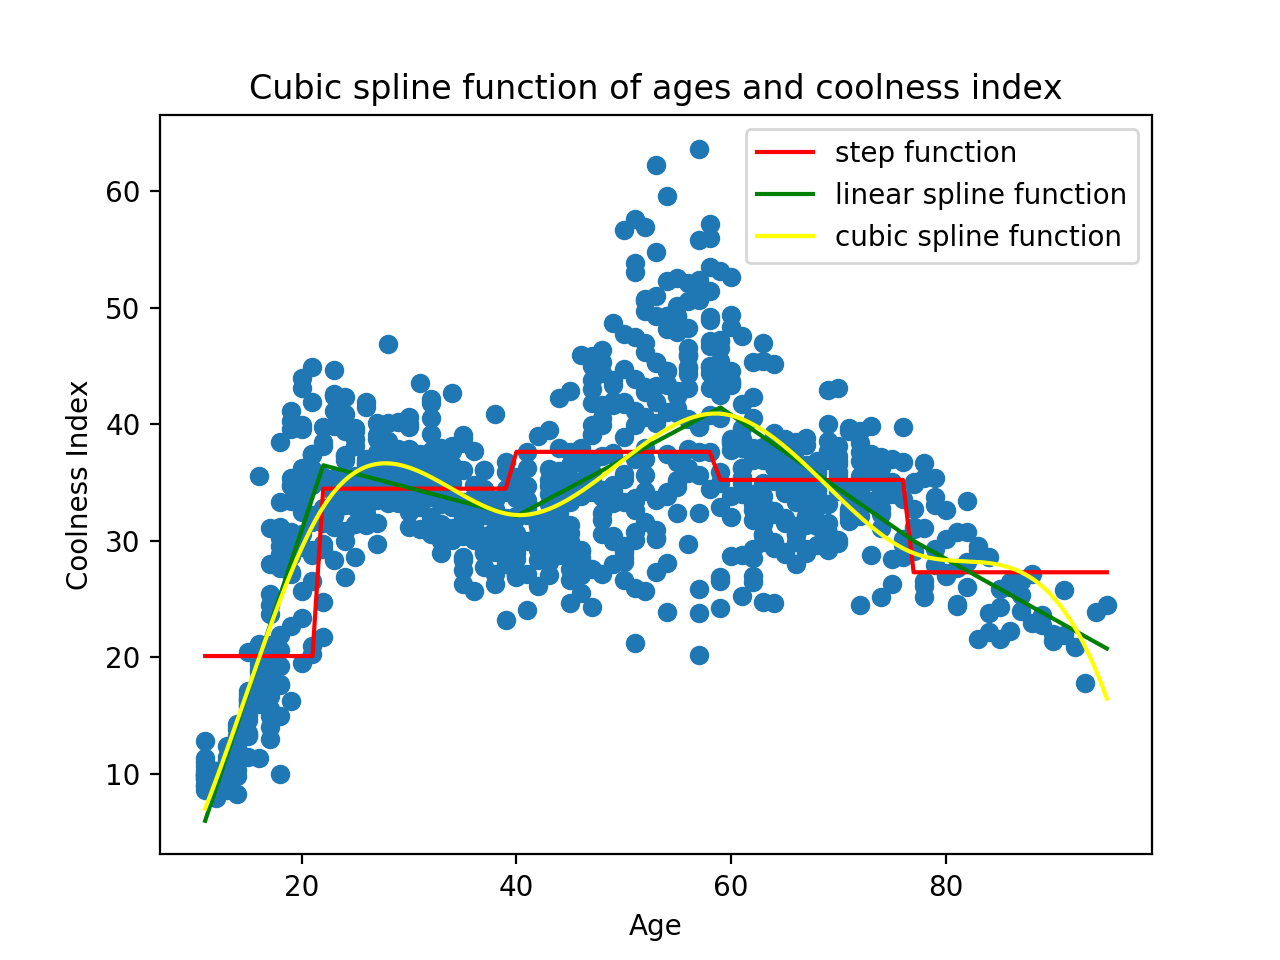

In [121]:
spl_cubic_coolness = LSQUnivariateSpline(age.values, index.values, knots, k = 3)
plt.figure(4)
plt.scatter(coolness["age"].values, coolness["index"].values)
plt.title("Cubic spline function of ages and coolness index")
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.plot(age, reg_result.predict(), color = 'red', label ="step function")
plt.plot(age_vec, spl_coolness(age_vec), "g-", label = "linear spline function")
plt.plot(age_vec, spl_cubic_coolness(age_vec), color = "yellow", label = "cubic spline function")
plt.legend()

In [122]:
print("The predicted coolness of a 73-year-old person is", float(spl_cubic_coolness(73)))


The predicted coolness of a 73-year-old person is 31.262429389257864
